In [1]:
from tweety import Twitter
from tweety.filters import SearchFilters
import pandas as pd

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [2]:
from tweety import Twitter

auth_token = """d64beac3ac7ff9c48f2d993eb6646110cb2556ac"""

# Cookies can be a str or a dict

app = Twitter("session9")
app.load_auth_token(auth_token)
print(app.me)

User(id=1743086770739171328, username=EuarExperiment, name=euar_experiment, verified=False)


In [3]:
app.start()
print(app.me)

User(id=1743086770739171328, username=EuarExperiment, name=euar_experiment, verified=False)

In [10]:
all_tweets = app.search('war', pages=5, wait_time=2)
all_tweets

Search(keyword=war, count=98, filter=None)

In [15]:
print(app.me)

User(id=1743086770739171328, username=EuarExperiment, name=euar_experiment, verified=False)


In [48]:
df_tweets = pd.DataFrame(columns=["Text"])

In [49]:
tweets = app.search('israel',pages=5, wait_time=20)
for tweet in tweets:
    new_row = pd.DataFrame({
    "Text": [tweet.text],
        })
    df_tweets = pd.concat([df_tweets, new_row], ignore_index=True)

In [50]:
tweets = app.search('palestine',pages=5, wait_time=20)
for tweet in tweets:
    new_row = pd.DataFrame({
    "Text": [tweet.text],
        })
    df_tweets = pd.concat([df_tweets, new_row], ignore_index=True)

In [51]:
print(f"Total rows in the DataFrame: {df_tweets.shape[0]}")

df_tweets.to_csv('tweets_data.csv', index=False)

print(df_tweets)

Total rows in the DataFrame: 196
                                                  Text
0    Iranian 🇮🇷 people stand with #Israel 🇮🇱. https...
1    BREAKING: KINDERGARDEN BOMBED BY ISRAEL MANY C...
2    95,000,000,000.00 for Israel and Ukraine meanw...
3    Gosh I can’t even imagine how sad this is for ...
4    Early morning at the Kerem Shalom border cross...
..                                                 ...
191  Free Palestine 🇵🇸 \nProtest \n\nFeb 11 (Sun) a...
192  So proud of my little Morehouse brothers. 🤧🥲👏🏾...
193  this is the kinda shit that happens when you d...
194  Palestine is victorious and it can never be de...
195  200+ marching down Kirkwood and around the squ...

[196 rows x 1 columns]


Most Common Unique Words in the DataFrame:
not: 3
man: 3
for: 3
home: 3
genocide: 3
on: 3
some: 3
gaza: 3
free: 3
palestine: 3


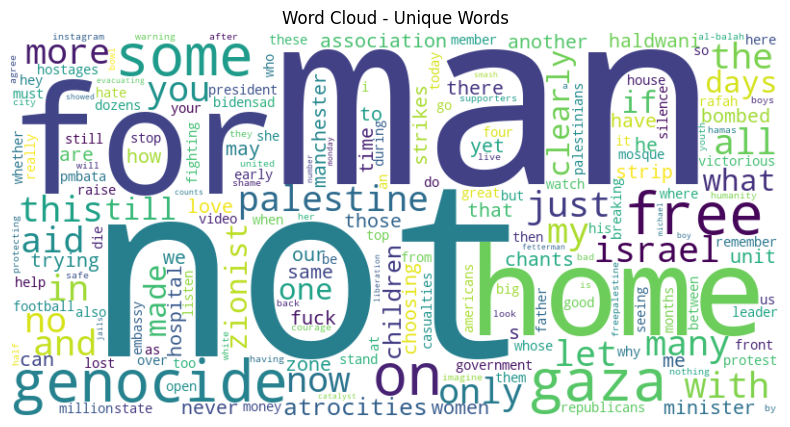

In [52]:
import pandas as pd
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to tokenize and get unique words from a sentence
def get_unique_words(sentence):
    words = TextBlob(sentence).words
    return set(words)

# Apply the function to each row in the DataFrame
df_tweets['UniqueWords'] = df_tweets['Text'].apply(get_unique_words)

# Combine all unique words from different sentences
all_unique_words = set.union(*df_tweets['UniqueWords'])

# Count the frequency of each unique word in the entire dataset
word_counts = Counter([word.lower() for word in all_unique_words])

# Print the most common unique words
most_common_words = word_counts.most_common(10)
print("Most Common Unique Words in the DataFrame:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Plot a word cloud of unique words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Unique Words')
plt.show()

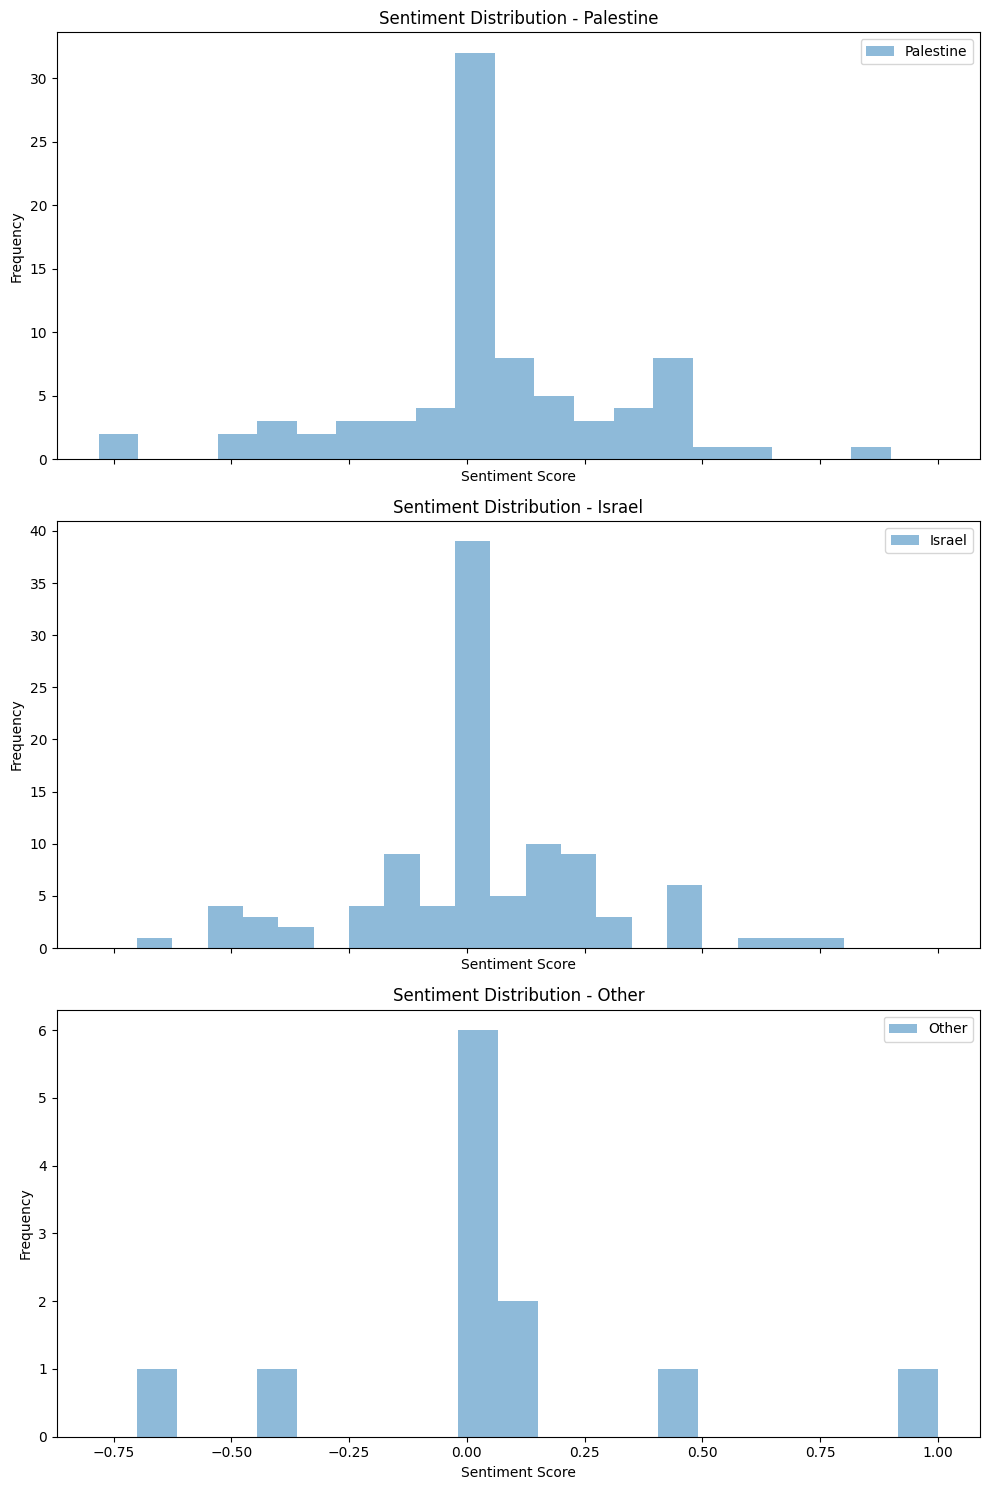

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

def analyze_sentiment(sentence):
    analysis = TextBlob(sentence)
    sentiment = analysis.sentiment.polarity
    return sentiment, "Positive" if sentiment > 0 else "Negative" if sentiment < 0 else "Neutral"

# Define keywords for grouping, derived from section above
palestine_keywords = ["palestine"]
israel_keywords = ["israel"]

# Group sentences by "War" and "Peace" with sentiment analysis
grouped_sentences = {'Palestine': [], 'Israel': [], 'Other': []}

# Lists to store sentiment scores for plotting
sentiment_scores = {'Palestine': [], 'Israel': [], 'Other': []}

for idx, sentence in enumerate(df_tweets["Text"]):
    sentiment_score, sentiment = analyze_sentiment(sentence)

    if any(keyword in sentence.lower() for keyword in palestine_keywords):
        grouped_sentences['Palestine'].append(sentiment)
        sentiment_scores['Palestine'].append(sentiment_score)
    elif any(keyword in sentence.lower() for keyword in israel_keywords):
        grouped_sentences['Israel'].append(sentiment)
        sentiment_scores['Israel'].append(sentiment_score)
    else:
        grouped_sentences['Other'].append(sentiment)
        sentiment_scores['Other'].append(sentiment_score)

# Plot sentiment for each category on its own subplot
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for ax, (category, scores) in zip(axes, sentiment_scores.items()):
    ax.hist(scores, bins=20, alpha=0.5, label=category)
    ax.set_title(f'Sentiment Distribution - {category}')
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()
